### Analysis of the Candy2016 dataset

This dataset is a survey from 2016 taken from https://www.scq.ubc.ca/so-much-candy-data-seriously/ 

The exact link to the dataset is https://www.scq.ubc.ca/wp-content/uploads/2016/10/BOING-BOING-CANDY-HIERARCHY-2016-SURVEY-Responses.xlsx 

Let's clean the dataset and try to answer the following questions:
<br>
<br>
<b>
    
1) Which sweets are the most well known and which the less well known? <br><br>

2) What are the most liked and the most disliked sweets?

3) What is the proportion of male and female respondents? 

4) Do male and female respondents like the same sweets?

5) What age group is predominant in the answers?

</b>


In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc


In [2]:
df = pd.read_excel("https://www.scq.ubc.ca/wp-content/uploads/2016/10/BOING-BOING-CANDY-HIERARCHY-2016-SURVEY-Responses.xlsx")
df.head()

Timestamp  \
0 2016-10-24 05:09:23.033   
1 2016-10-24 05:09:54.798   
2 2016-10-24 05:13:06.734   
3 2016-10-24 05:14:17.192   
4 2016-10-24 05:14:24.625   

  Are you going actually going trick or treating yourself? Your gender:  \
0                                                 No               Male   
1                                                 No               Male   
2                                                 No             Female   
3                                                 No               Male   
4                                                Yes               Male   

  How old are you? Which country do you live in?  \
0               22                        Canada   
1               45                           usa   
2               48                            US   
3               57                           usa   
4               42                           USA   

  Which state, province, county do you live in?  [100 Grand Bar]  \
0                                       Ontario              JOY   
1                                            il              MEH   
2                                      Colorado              JOY   
3                                            il              JOY   
4                                  South Dakota              MEH   

   [Anonymous brown globs that come in black and orange wrappers]  \
0                                            DESPAIR                
1                                                MEH                
2                                            DESPAIR                
3                                                MEH                
4                                            DESPAIR                

   [Any full-sized candy bar]  [Black Jacks]  ...  \
0                         JOY            MEH  ...   
1                         JOY            JOY  ...   
2                         JOY            MEH  ...   
3                         JOY            MEH  ...   
4                         JOY        DESPAIR  ...   

  Please estimate the degree(s) of separation you have from the following celebrities [JK Rowling]  \
0                                        3 or higher                                                 
1                                        3 or higher                                                 
2                                        3 or higher                                                 
3                                        3 or higher                                                 
4                                        3 or higher                                                 

  Please estimate the degree(s) of separation you have from the following celebrities [JJ Abrams]  \
0                                                  2                                                
1                                        3 or higher                                                
2                                        3 or higher                                                
3                                        3 or higher                                                
4                                        3 or higher                                                

  Please estimate the degree(s) of separation you have from the following celebrities [Beyoncé]  \
0                                        3 or higher                                              
1                                        3 or higher                                              
2                                        3 or higher                                              
3                                        3 or higher                                              
4                                        3 or higher                                              

  Please estimate the degree(s) of separation you have from the following celebrities [Bieber]  \
0                    

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Columns: 123 entries, Timestamp to  [York Peppermint Patties] Ignore
dtypes: datetime64[ns](1), float64(1), object(121)
memory usage: 1.2+ MB


In [4]:
# seeing that we have 123 columns we can't see all the names in .head() so I'm listing them below

list(df.columns.values) 

['Timestamp',
 'Are you going actually going trick or treating yourself?',
 'Your gender:',
 'How old are you?',
 'Which country do you live in?',
 'Which state, province, county do you live in?',
 ' [100 Grand Bar]',
 ' [Anonymous brown globs that come in black and orange wrappers]',
 ' [Any full-sized candy bar]',
 ' [Black Jacks]',
 ' [Bonkers (the candy)]',
 ' [Bonkers (the board game)]',
 ' [Bottle Caps]',
 " [Box'o'Raisins]",
 ' [Broken glow stick]',
 ' [Butterfinger]',
 ' [Cadbury Creme Eggs]',
 ' [Candy Corn]',
 ' [Candy that is clearly just the stuff given out for free at restaurants]',
 ' [Caramellos]',
 ' [Cash, or other forms of legal tender]',
 ' [Chardonnay]',
 ' [Chick-o-Sticks (we don’t know what that is)]',
 ' [Chiclets]',
 ' [Coffee Crisp]',
 ' [Creepy Religious comics/Chick Tracts]',
 ' [Dental paraphenalia]',
 ' [Dots]',
 ' [Dove Bars]',
 ' [Fuzzy Peaches]',
 ' [Generic Brand Acetaminophen]',
 ' [Glow sticks]',
 ' [Goo Goo Clusters]',
 " [Good N' Plenty]",
 ' [Gum f

In [5]:
# The columns after the column ' [York Peppermint Patties]' are irrelevant for the analysis so
# I'm dropping all those columns which actually means keeping all columns before it

df = df.loc[:, :' [York Peppermint Patties]']

In [6]:
list(df.columns.values)

['Timestamp',
 'Are you going actually going trick or treating yourself?',
 'Your gender:',
 'How old are you?',
 'Which country do you live in?',
 'Which state, province, county do you live in?',
 ' [100 Grand Bar]',
 ' [Anonymous brown globs that come in black and orange wrappers]',
 ' [Any full-sized candy bar]',
 ' [Black Jacks]',
 ' [Bonkers (the candy)]',
 ' [Bonkers (the board game)]',
 ' [Bottle Caps]',
 " [Box'o'Raisins]",
 ' [Broken glow stick]',
 ' [Butterfinger]',
 ' [Cadbury Creme Eggs]',
 ' [Candy Corn]',
 ' [Candy that is clearly just the stuff given out for free at restaurants]',
 ' [Caramellos]',
 ' [Cash, or other forms of legal tender]',
 ' [Chardonnay]',
 ' [Chick-o-Sticks (we don’t know what that is)]',
 ' [Chiclets]',
 ' [Coffee Crisp]',
 ' [Creepy Religious comics/Chick Tracts]',
 ' [Dental paraphenalia]',
 ' [Dots]',
 ' [Dove Bars]',
 ' [Fuzzy Peaches]',
 ' [Generic Brand Acetaminophen]',
 ' [Glow sticks]',
 ' [Goo Goo Clusters]',
 " [Good N' Plenty]",
 ' [Gum f

In [7]:

# removing the 'Are you going actually going trick or treating yourself?' 
# column as it doesn't provide analysable data


df.drop(df.columns[1], axis = 1, inplace = True)
list(df.columns.values)

['Timestamp',
 'Your gender:',
 'How old are you?',
 'Which country do you live in?',
 'Which state, province, county do you live in?',
 ' [100 Grand Bar]',
 ' [Anonymous brown globs that come in black and orange wrappers]',
 ' [Any full-sized candy bar]',
 ' [Black Jacks]',
 ' [Bonkers (the candy)]',
 ' [Bonkers (the board game)]',
 ' [Bottle Caps]',
 " [Box'o'Raisins]",
 ' [Broken glow stick]',
 ' [Butterfinger]',
 ' [Cadbury Creme Eggs]',
 ' [Candy Corn]',
 ' [Candy that is clearly just the stuff given out for free at restaurants]',
 ' [Caramellos]',
 ' [Cash, or other forms of legal tender]',
 ' [Chardonnay]',
 ' [Chick-o-Sticks (we don’t know what that is)]',
 ' [Chiclets]',
 ' [Coffee Crisp]',
 ' [Creepy Religious comics/Chick Tracts]',
 ' [Dental paraphenalia]',
 ' [Dots]',
 ' [Dove Bars]',
 ' [Fuzzy Peaches]',
 ' [Generic Brand Acetaminophen]',
 ' [Glow sticks]',
 ' [Goo Goo Clusters]',
 " [Good N' Plenty]",
 ' [Gum from baseball cards]',
 ' [Gummy Bears straight up]',
 ' [Hard

In [8]:
pd.set_option('display.max_rows', 107)
df.dtypes

Timestamp                                                                                    datetime64[ns]
Your gender:                                                                                         object
How old are you?                                                                                     object
Which country do you live in?                                                                        object
Which state, province, county do you live in?                                                        object
 [100 Grand Bar]                                                                                     object
 [Anonymous brown globs that come in black and orange wrappers]                                      object
 [Any full-sized candy bar]                                                                          object
 [Black Jacks]                                                                                       object
 [Bonkers (the candy)]      

In [9]:
#checking the age column values

df["How old are you?"].value_counts()

35                                                     50
33                                                     49
38                                                     48
45                                                     48
34                                                     45
42                                                     45
46                                                     44
47                                                     41
40                                                     40
32                                                     39
43                                                     38
30                                                     35
48                                                     34
36                                                     34
37                                                     34
31                                                     33
44                                                     32
39            

In [10]:
# we need to keep only numerical age values. To do so, we will create a boolean column
# that would return False if the age value string is not a composed of digits

df["age_bool"]= df["How old are you?"].str.isdigit() 
df["age_bool"].value_counts()

False    35
Name: age_bool, dtype: int64

In [11]:
# controlling it shows NaN in the age_bool column when "how old are you" column value is a 
# number and a False value when it's not a number

df.head(100)

Timestamp        Your gender:            How old are you?  \
0  2016-10-24 05:09:23.033                Male                          22   
1  2016-10-24 05:09:54.798                Male                          45   
2  2016-10-24 05:13:06.734              Female                          48   
3  2016-10-24 05:14:17.192                Male                          57   
4  2016-10-24 05:14:24.625                Male                          42   
5  2016-10-24 05:16:43.126                Male                          41   
6  2016-10-24 05:16:50.572                Male                          47   
7  2016-10-24 05:16:55.324                Male                          28   
8  2016-10-24 05:17:49.292                Male                          44   
9  2016-10-24 05:18:51.021              Female                          41   
10 2016-10-24 05:20:21.125               Other                          34   
11 2016-10-24 05:21:19.858              Female                          46   
12 2016-10-24 05:21:27.708                Male                          41   
13 2016-10-24 05:22:12.699                Male                          45   
14 2016-10-24 05:22:30.678                Male                          40   
15 2016-10-24 05:24:08.316              Female                          31   
16 2016-10-24 05:24:11.446              Female                          33   
17 2016-10-24 05:26:18.333                Male                          35   
18 2016-10-24 05:26:35.167                Male                          49   
19 2016-10-24 05:27:00.491                Male                          44   
20 2016-10-24 05:30:39.763                Male                          45   
21 2016-10-24 05:31:48.862                Male                          34   
22 2016-10-24 05:33:18.915                Male                          48   
23 2016-10-24 05:33:28.488              Female                          16   
24 2016-10-24 05:34:36.438                Male                          60   
25 2016-10-24 05:34:37.116                Male                          30   
26 2016-10-24 05:34:40.001              Female                          51   
27 2016-10-24 05:35:45.940  I'd rather not say                          31   
28 2016-10-24 05:36:13.156                Male                          51   
29 2016-10-24 05:36:44.146  I'd rather not say                          33   
30 2016-10-24 05:36:57.130                Male                          40   
31 2016-10-24 05:37:19.368                Male                          38   
32 2016-10-24 05:37:49.446                Male                          35   
33 2016-10-24 05:38:40.977                Male                          54   
34 2016-10-24 05:39:57.505                Male                          33   
35 2016-10-24 05:41:24.267              Female                          33   
36 2016-10-24 05:41:33.588                Male                          43   
37 2016-10-24 05:42:42.462                Male                          50   
38 2016-10-24 05:44:28.365                Male                          48   
39 2016-10-24 05:45:28.953                Male                          33   
40 2016-10-24 05:45:54.442                Male                          34   
41 2016-10-24 05:45:57.634                Male                          33   
42 2016-10-24 05:46:14.788              Female                          37   
43 2016-10-24 05:46:36.139                Male                          35   
44 2016-10-24 05:49:18.148                Male                          33   
45 2016-10-24 05:49:21.514                Male                          48   
46 2016-10-24 05:49:51.906              Female                          35   
47 2016-10-24 05:50:02.903                Male                          34   
48 2016-10-24 05:50:16.728                Male                          40   
49 2016-10-24 05:51:41.073                Male                          55   
50 2016-10-24 05:51:59.346             

In [12]:
# We'll delete the rows where the age is not a numerical value by deleting the age_bool False rows

df.drop( df[ df['age_bool'] == False ].index , inplace=True)
df["How old are you?"].value_counts()

3.500000e+01    50
3.300000e+01    49
3.800000e+01    48
4.500000e+01    48
4.200000e+01    45
3.400000e+01    45
4.600000e+01    44
4.700000e+01    41
4.000000e+01    40
3.200000e+01    39
4.300000e+01    38
3.000000e+01    35
3.700000e+01    34
3.600000e+01    34
4.800000e+01    34
3.100000e+01    33
4.400000e+01    32
3.900000e+01    31
4.100000e+01    30
2.800000e+01    30
2.900000e+01    30
5.000000e+01    29
5.500000e+01    26
2.600000e+01    26
4.900000e+01    24
5.200000e+01    20
5.800000e+01    20
5.400000e+01    19
5.100000e+01    17
2.700000e+01    17
5.600000e+01    17
5.300000e+01    16
2.500000e+01    13
5.700000e+01    12
5.900000e+01    12
6.000000e+01    11
2.400000e+01    10
1.700000e+01     7
6.300000e+01     6
2.300000e+01     6
6.100000e+01     6
6.400000e+01     6
1.800000e+01     5
2.000000e+01     5
1.600000e+01     5
6.200000e+01     5
1.900000e+01     4
2.200000e+01     4
6.700000e+01     4
6.600000e+01     3
2.100000e+01     2
7.000000e+01     2
7.100000e+01

In [13]:
# just to check the "how old are you" column is showing properly
df.head(100)

Timestamp        Your gender: How old are you?  \
0   2016-10-24 05:09:23.033                Male               22   
1   2016-10-24 05:09:54.798                Male               45   
2   2016-10-24 05:13:06.734              Female               48   
3   2016-10-24 05:14:17.192                Male               57   
4   2016-10-24 05:14:24.625                Male               42   
5   2016-10-24 05:16:43.126                Male               41   
6   2016-10-24 05:16:50.572                Male               47   
7   2016-10-24 05:16:55.324                Male               28   
8   2016-10-24 05:17:49.292                Male               44   
9   2016-10-24 05:18:51.021              Female               41   
10  2016-10-24 05:20:21.125               Other               34   
11  2016-10-24 05:21:19.858              Female               46   
12  2016-10-24 05:21:27.708                Male               41   
13  2016-10-24 05:22:12.699                Male               45   
14  2016-10-24 05:22:30.678                Male               40   
15  2016-10-24 05:24:08.316              Female               31   
16  2016-10-24 05:24:11.446              Female               33   
17  2016-10-24 05:26:18.333                Male               35   
18  2016-10-24 05:26:35.167                Male               49   
19  2016-10-24 05:27:00.491                Male               44   
20  2016-10-24 05:30:39.763                Male               45   
21  2016-10-24 05:31:48.862                Male               34   
22  2016-10-24 05:33:18.915                Male               48   
23  2016-10-24 05:33:28.488              Female               16   
24  2016-10-24 05:34:36.438                Male               60   
25  2016-10-24 05:34:37.116                Male               30   
26  2016-10-24 05:34:40.001              Female               51   
27  2016-10-24 05:35:45.940  I'd rather not say               31   
28  2016-10-24 05:36:13.156                Male               51   
29  2016-10-24 05:36:44.146  I'd rather not say               33   
30  2016-10-24 05:36:57.130                Male               40   
31  2016-10-24 05:37:19.368                Male               38   
32  2016-10-24 05:37:49.446                Male               35   
33  2016-10-24 05:38:40.977                Male               54   
34  2016-10-24 05:39:57.505                Male               33   
35  2016-10-24 05:41:24.267              Female               33   
36  2016-10-24 05:41:33.588                Male               43   
37  2016-10-24 05:42:42.462                Male               50   
38  2016-10-24 05:44:28.365                Male               48   
39  2016-10-24 05:45:28.953                Male               33   
40  2016-10-24 05:45:54.442                Male               34   
41  2016-10-24 05:45:57.634                Male               33   
42  2016-10-24 05:46:14.788              Female               37   
43  2016-10-24 05:46:36.139                Male               35   
44  2016-10-24 05:49:18.148                Male               33   
45  2016-10-24 05:49:21.514                Male               48   
46  2016-10-24 05:49:51.906              Female               35   
47  2016-10-24 05:50:02.903                Male               34   
48  2016-10-24 05:50:16.728                Male               40   
49  2016-10-24 05:51:41.073                Male               55   
50  2016-10-24 05:51:59.346                Male               54   
51  2016-10-24 05:52:14.650                Male               58   
52  2016-10-24 05:53:12.342                Male               43   
53  2016-10-24 05:53:20.168              Female               32   
54  2016-10-24 05:54:14.558                Male               32   
55  2016-10-24 05:54:15.216                Male               47   
56  2016-10-24 05:54:27.336                Male               42   
58  2016-10-24 05:55:37.722                Male               49   
59  20

In [14]:
# transforming the age column to integer, previously dropping the NaNs

df = df[pd.notnull(df['How old are you?'])]
df['How old are you?'] = df['How old are you?'].astype(int)
df['How old are you?'].value_counts()

35                     50
33                     49
38                     48
45                     48
34                     45
42                     45
46                     44
47                     41
40                     40
32                     39
43                     38
30                     35
36                     34
48                     34
37                     34
31                     33
44                     32
39                     31
29                     30
28                     30
41                     30
50                     29
55                     26
26                     26
49                     24
58                     20
52                     20
54                     19
51                     17
27                     17
56                     17
53                     16
25                     13
57                     12
59                     12
60                     11
24                     10
23                      7
17          

In [15]:
# dropping the rows with excessive numbers (142 and 1000000000000000000)

df.drop( df[ df['How old are you?'] >= 100 ].index , inplace=True)
df["How old are you?"].value_counts()

35    50
33    49
45    48
38    48
34    45
42    45
46    44
47    41
40    40
32    39
43    38
30    35
37    34
48    34
36    34
31    33
44    32
39    31
29    30
28    30
41    30
50    29
55    26
26    26
49    24
58    20
52    20
54    19
51    17
27    17
56    17
53    16
25    13
57    12
59    12
60    11
24    10
23     7
17     7
61     6
64     6
63     6
62     5
16     5
18     5
20     5
22     4
67     4
19     4
66     3
21     2
70     2
10     2
71     2
68     2
13     2
11     1
12     1
15     1
14     1
82     1
81     1
65     1
74     1
78     1
79     1
7      1
Name: How old are you?, dtype: int64

In [16]:
#checking the gender column values

df["Your gender:"].value_counts()

Male                  758
Female                393
Other                  17
I'd rather not say     16
Name: Your gender:, dtype: int64

In [17]:
# setting the gender column values to category

df["Your gender:"] = df["Your gender:"].astype("category")

In [18]:
#check for duplicated rows
df["is_duplicate"]= df.duplicated()
df["is_duplicate"].value_counts()

False    1189
Name: is_duplicate, dtype: int64

In [19]:
#checking the country column values

df['Which country do you live in?'].value_counts()

USA                            421
United States                  180
usa                            122
Canada                          97
US                              85
us                              32
United States of America        32
Usa                             32
canada                          18
USA                             18
united states                   15
United States                   10
UK                               8
U.S.A.                           5
United states                    5
Us                               5
U.S.                             5
Japan                            4
United Kingdom                   4
Germany                          4
Australia                        3
uk                               3
Mexico                           3
Murica                           3
United States of America         3
New Zealand                      3
England                          3
USA! USA! USA!                   2
u.s.                

In [20]:
# This is what happens when you use a free text field instead of a dropdown...
# You get very unexpected results.

df['Which country do you live in?'].unique()

array(['Canada', 'usa', 'US', 'USA', 'UK', 'United States of America',
       'uSA', 'Japan', 'united states', 'USA ', 'canada', 'United States',
       'us', 'france', 'USSA', 'United States of America ', 'U.S.A.',
       'england', 'uk', 'Switzerland', 'Murica', 'United Kingdom',
       'Neverland', 'USA!', 'Korea', 'Usa', 'U.S.', 'Us', 'America ',
       'Units States', 'belgium', 'croatia', 'United states', 'Portugal',
       'England', 'USA USA USA', 'the best one - usa', 'USA! USA! USA!',
       'united states ', 'españa', 'u.s.', "there isn't one for old men",
       'United States ', 'Panama', 'The Yoo Ess of Aaayyyyyy',
       'United Kindom', 'France', 'America', 'hungary',
       'united states of america', 'UK ', nan, 'Austria', 'New Zealand',
       'Germany', 'Mexico', 'Australia', 'Brasil', "god's country",
       'South Korea', 'USA!!!!!!', 'Philippines', ' United States', 'EUA',
       'USA! USA!', 'sweden', 'Canada ', 'United Sates',
       'The Netherlands', 'Finland

In [21]:
# We'll delete the country and county columns

df.drop(df.columns[3:5], axis = 1, inplace = True)
list(df.columns.values)


['Timestamp',
 'Your gender:',
 'How old are you?',
 ' [100 Grand Bar]',
 ' [Anonymous brown globs that come in black and orange wrappers]',
 ' [Any full-sized candy bar]',
 ' [Black Jacks]',
 ' [Bonkers (the candy)]',
 ' [Bonkers (the board game)]',
 ' [Bottle Caps]',
 " [Box'o'Raisins]",
 ' [Broken glow stick]',
 ' [Butterfinger]',
 ' [Cadbury Creme Eggs]',
 ' [Candy Corn]',
 ' [Candy that is clearly just the stuff given out for free at restaurants]',
 ' [Caramellos]',
 ' [Cash, or other forms of legal tender]',
 ' [Chardonnay]',
 ' [Chick-o-Sticks (we don’t know what that is)]',
 ' [Chiclets]',
 ' [Coffee Crisp]',
 ' [Creepy Religious comics/Chick Tracts]',
 ' [Dental paraphenalia]',
 ' [Dots]',
 ' [Dove Bars]',
 ' [Fuzzy Peaches]',
 ' [Generic Brand Acetaminophen]',
 ' [Glow sticks]',
 ' [Goo Goo Clusters]',
 " [Good N' Plenty]",
 ' [Gum from baseball cards]',
 ' [Gummy Bears straight up]',
 ' [Hard Candy]',
 ' [Healthy Fruit]',
 ' [Heath Bar]',
 " [Hershey's Dark Chocolate]",
 ' [

In [22]:
# We'll also delete the 'age_bool' and 'is_duplicate' columns

df = df.drop(['age_bool', 'is_duplicate'], axis=1)
list(df.columns.values)

['Timestamp',
 'Your gender:',
 'How old are you?',
 ' [100 Grand Bar]',
 ' [Anonymous brown globs that come in black and orange wrappers]',
 ' [Any full-sized candy bar]',
 ' [Black Jacks]',
 ' [Bonkers (the candy)]',
 ' [Bonkers (the board game)]',
 ' [Bottle Caps]',
 " [Box'o'Raisins]",
 ' [Broken glow stick]',
 ' [Butterfinger]',
 ' [Cadbury Creme Eggs]',
 ' [Candy Corn]',
 ' [Candy that is clearly just the stuff given out for free at restaurants]',
 ' [Caramellos]',
 ' [Cash, or other forms of legal tender]',
 ' [Chardonnay]',
 ' [Chick-o-Sticks (we don’t know what that is)]',
 ' [Chiclets]',
 ' [Coffee Crisp]',
 ' [Creepy Religious comics/Chick Tracts]',
 ' [Dental paraphenalia]',
 ' [Dots]',
 ' [Dove Bars]',
 ' [Fuzzy Peaches]',
 ' [Generic Brand Acetaminophen]',
 ' [Glow sticks]',
 ' [Goo Goo Clusters]',
 " [Good N' Plenty]",
 ' [Gum from baseball cards]',
 ' [Gummy Bears straight up]',
 ' [Hard Candy]',
 ' [Healthy Fruit]',
 ' [Heath Bar]',
 " [Hershey's Dark Chocolate]",
 ' [

In [23]:
#checking the NAN values in all columns

print(df.isnull().sum())

Timestamp                                                                                      0
Your gender:                                                                                   5
How old are you?                                                                               0
 [100 Grand Bar]                                                                              72
 [Anonymous brown globs that come in black and orange wrappers]                               21
 [Any full-sized candy bar]                                                                   15
 [Black Jacks]                                                                               190
 [Bonkers (the candy)]                                                                       213
 [Bonkers (the board game)]                                                                  222
 [Bottle Caps]                                                                                73
 [Box'o'Raisins]              

In [24]:
# delete rows with NaN in the Gender column

df = df[pd.notnull(df['Your gender:'])]
print(df['Your gender:'].isnull().sum())

0


In [25]:
# Let's delete the Timestamp column as 

df = df.drop(['Timestamp'], axis=1)
list(df.columns.values)

['Your gender:',
 'How old are you?',
 ' [100 Grand Bar]',
 ' [Anonymous brown globs that come in black and orange wrappers]',
 ' [Any full-sized candy bar]',
 ' [Black Jacks]',
 ' [Bonkers (the candy)]',
 ' [Bonkers (the board game)]',
 ' [Bottle Caps]',
 " [Box'o'Raisins]",
 ' [Broken glow stick]',
 ' [Butterfinger]',
 ' [Cadbury Creme Eggs]',
 ' [Candy Corn]',
 ' [Candy that is clearly just the stuff given out for free at restaurants]',
 ' [Caramellos]',
 ' [Cash, or other forms of legal tender]',
 ' [Chardonnay]',
 ' [Chick-o-Sticks (we don’t know what that is)]',
 ' [Chiclets]',
 ' [Coffee Crisp]',
 ' [Creepy Religious comics/Chick Tracts]',
 ' [Dental paraphenalia]',
 ' [Dots]',
 ' [Dove Bars]',
 ' [Fuzzy Peaches]',
 ' [Generic Brand Acetaminophen]',
 ' [Glow sticks]',
 ' [Goo Goo Clusters]',
 " [Good N' Plenty]",
 ' [Gum from baseball cards]',
 ' [Gummy Bears straight up]',
 ' [Hard Candy]',
 ' [Healthy Fruit]',
 ' [Heath Bar]',
 " [Hershey's Dark Chocolate]",
 ' [Hershey’s Milk

In [26]:
# to see the possible answers to a candy
df[' [100 Grand Bar]'].value_counts()

JOY        519
MEH        516
DESPAIR     77
Name:  [100 Grand Bar], dtype: int64

We are now left with a 2 columns determining the age and the gender of the participants of the survey, as well as the individual reactions to each of the candies. 

As the NaN values show, the answer is optional so a respondent could skip giving their opinion about a sweet. 

As we can see previously, the possible reactions to each candy are JOY, MEH and DESPAIR.

Let's now try to answer our questions, starting with :

<b>1) Which sweets are the most well known and which the less well known?</b>

To answer this, I'd go to find the max and the min values of the NaN in the sweets columns. It's my subjective way to measuring it, as I'd assume that if a respondent wouldn't know about a sweet, they wouldn't give any reaction to it and just skip it.

In [27]:
print(df.isnull().sum().sort_values(ascending=True))

Your gender:                                                                                   0
How old are you?                                                                               0
 [Hershey’s Milk Chocolate]                                                                   13
 [Hershey's Kisses]                                                                           13
 [Any full-sized candy bar]                                                                   15
 [Candy Corn]                                                                                 16
 [Kit Kat]                                                                                    17
 [Cadbury Creme Eggs]                                                                         18
 [Cash, or other forms of legal tender]                                                       18
 [Hershey's Dark Chocolate]                                                                   19
 [Butterfinger]               

The answer to the first question :

<b>1) Which sweets are the most well known and which the less well known?</b>

is

<b> Most well known : Hershey’s Milk Chocolate <br>
Least well known : Maynards </b>

In [28]:
# We can also try to make a horizontal bar chart from it so it's more visual.
# The columns Gender and Age are irrelevant so we'll make it on a restricted database
# making it pink because pink makes me think of candy.

df_candies = df.drop(['Your gender:', 'How old are you?'], axis=1)

df_candies.isnull().sum().sort_values(ascending=False).plot.barh(figsize=(80,220), color='pink')
plt.xlabel('Number of survey missing answers', fontsize=100)
plt.ylabel('Candy names', fontsize=100)
plt.title("Candies unpopularity - from most to least popular", fontsize=120)
plt.yticks(fontsize=80, rotation=45)
plt.xticks([0, 50, 100, 150, 200, 250, 300],['0','50','100', '150', '200', '250', '300'],fontsize=80)

([<matplotlib.axis.XTick at 0x1251bbbd0>,
 <a list of 7 Text xticklabel objects>)

Next question:

<b>2) What are the most liked and the most disliked sweets?</b>

To find out, we simply can check which sweet has most JOY and which has more DESPAIR answers, proportionally to the total answers for that sweet.



In [29]:
#just to have a generic view

for col in df_candies:
    print(df_candies[col].value_counts(normalize=True))

JOY        0.466727
MEH        0.464029
DESPAIR    0.069245
Name:  [100 Grand Bar], dtype: float64
DESPAIR    0.693895
MEH        0.226139
JOY        0.079966
Name:  [Anonymous brown globs that come in black and orange wrappers], dtype: float64
JOY        0.847733
MEH        0.140291
DESPAIR    0.011976
Name:  [Any full-sized candy bar], dtype: float64
DESPAIR    0.486922
MEH        0.443662
JOY        0.069416
Name:  [Black Jacks], dtype: float64
MEH        0.607621
DESPAIR    0.321318
JOY        0.071061
Name:  [Bonkers (the candy)], dtype: float64
MEH        0.476091
DESPAIR    0.364865
JOY        0.159044
Name:  [Bonkers (the board game)], dtype: float64
MEH        0.396040
DESPAIR    0.329433
JOY        0.274527
Name:  [Bottle Caps], dtype: float64
DESPAIR    0.612263
MEH        0.305699
JOY        0.082038
Name:  [Box'o'Raisins], dtype: float64
DESPAIR    0.899567
MEH        0.082251
JOY        0.018182
Name:  [Broken glow stick], dtype: float64
JOY        0.636598
MEH        0.2

In [30]:
# We'll need a dataframe with the data we need to analyse.
# The column names should be Candy name and 
# then the respective proportion of each reaction. 
# To do so, we'll first create lists that will make our dataframe later

df_candy_list = list()
df_joy_list = list()
df_meh_list = list()
df_despair_list = list()

# And with the following loop we'll fill the list with values from the df_candies

for col in df_candies:
    # the following line is to calculate the total answers for each candy
    total_col = sum(df_candies[col]=="JOY")+sum(df_candies[col]=="DESPAIR")+sum(df_candies[col]=="MEH")
    # the following 3 lines are to calculare the proportion of JOY, MEH and DESPAIR answers
    sum_joy = sum(df_candies[col]=="JOY")/total_col
    sum_despair = sum(df_candies[col]=="DESPAIR")/total_col
    sum_meh = sum(df_candies[col]=="MEH")/total_col
    # the print is just to make sure visually we're doing it right
    print(col, sum_joy, sum_meh, sum_despair)
    # the following 4 lines are to fill in the lists that will compose our future dataframe
    df_candy_list.append(col)
    df_joy_list.append(sum_joy)
    df_meh_list.append(sum_meh)
    df_despair_list.append(sum_despair)
    

 [100 Grand Bar] 0.46672661870503596 0.46402877697841727 0.06924460431654676
 [Anonymous brown globs that come in black and orange wrappers] 0.07996560619088564 0.22613929492691315 0.6938950988822012
 [Any full-sized candy bar] 0.8477331052181352 0.14029084687767324 0.011976047904191617
 [Black Jacks] 0.06941649899396378 0.44366197183098594 0.4869215291750503
 [Bonkers (the candy)] 0.07106076210092688 0.607621009268795 0.3213182286302781
 [Bonkers (the board game)] 0.15904365904365905 0.4760914760914761 0.36486486486486486
 [Bottle Caps] 0.2745274527452745 0.39603960396039606 0.32943294329432943
 [Box'o'Raisins] 0.08203799654576857 0.30569948186528495 0.6122625215889465
 [Broken glow stick] 0.01818181818181818 0.08225108225108226 0.8995670995670996
 [Butterfinger] 0.6365979381443299 0.24742268041237114 0.11597938144329897
 [Cadbury Creme Eggs] 0.4288164665523156 0.3344768439108062 0.2367066895368782
 [Candy Corn] 0.2782534246575342 0.3321917808219178 0.3895547945205479
 [Candy that is 

In [31]:
# Let's create the new dataframe!!!

df_candy_reac = {'Candy':df_candy_list,'Joy':df_joy_list, 'Meh':df_meh_list, 'Despair':df_despair_list}
df_candy_reac = pd.DataFrame(df_candy_reac)
df_candy_reac.head()

Candy       Joy       Meh  \
0                                    [100 Grand Bar]  0.466727  0.464029   
1   [Anonymous brown globs that come in black and...  0.079966  0.226139   
2                         [Any full-sized candy bar]  0.847733  0.140291   
3                                      [Black Jacks]  0.069416  0.443662   
4                              [Bonkers (the candy)]  0.071061  0.607621   

    Despair  
0  0.069245  
1  0.693895  
2  0.011976  
3  0.486922  
4  0.321318

In [32]:
# By ordering the new dataframe by Joy value, we'll find the most liked candies
df_candy_reac.sort_values(by=['Joy'],ascending=False)

Candy       Joy       Meh  \
2                          [Any full-sized candy bar]  0.847733  0.140291   
74                       [Reese’s Peanut Butter Cups]  0.808950  0.115318   
14             [Cash, or other forms of legal tender]  0.807890  0.146655   
44                                          [Kit Kat]  0.778063  0.185090   
93                                             [Twix]  0.761905  0.166234   
81                                         [Snickers]  0.752819  0.175195   
49                                    [Lindt Truffle]  0.730228  0.205624   
91                     [Tolberone something or other]  0.727431  0.210938   
58                                     [Peanut M&M’s]  0.702494  0.197764   
56                                        [Milky Way]  0.641869  0.293253   
15                                       [Chardonnay]  0.640459  0.191696   
9                                      [Butterfinger]  0.636598  0.247423   
77                                            [Rolos]  0.627846  0.270578   
68                                    [Nestle Crunch]  0.615854  0.314460   
75                                   [Reese's Pieces]  0.615517  0.243103   
22                                        [Dove Bars]  0.610674  0.295713   
99                          [York Peppermint Patties]  0.602812  0.254833   
33                         [Hershey's Dark Chocolate]  0.587124  0.294421   
57                                     [Regular M&Ms]  0.584841  0.345392   
90                                 [Three Musketeers]  0.579545  0.305944   
32                                        [Heath Bar]  0.572687  0.295154   
51                                             [Mars]  0.569798  0.350307   
64                                      [Mint Juleps]  0.556398  0.215166   
59                                       [Blue M&M's]  0.552889  0.357333   
40                                     [Junior Mints]  0.532230  0.305749   
60                                        [Red M&M's]  0.529725  0.375333   
13                                       [Caramellos]  0.505396  0.375899   
78                                         [Skittles]  0.489196  0.343129   
96                             [Whatchamacallit Bars]  0.489182  0.293509   
0                                     [100 Grand Bar]  0.466727  0.464029   
65                                      [Mr. Goodbar]  0.460289  0.407942   
34                         [Hershey’s Milk Chocolate]  0.452605  0.399658   
67                                            [Nerds]  0.449694  0.353456   
35                                 [Hershey's Kisses]  0.443211  0.417592   
55                                        [Milk Duds]  0.442493  0.388060   
84                                        [Starburst]  0.441739  0.387826   
95                                          [Vicodin]  0.430391  0.181074   
10                               [Cadbury Creme Eggs]  0.428816  0.334477   
79                              [Smarties (American)]  0.426445  0.328371   
85                                      [Sweet Tarts]  0.420732  0.369338   
86                                     [Swedish Fish]  0.415194  0.327739   
29                          [Gummy Bears straight up]  0.415078  0.318891   
38                     [Jolly Ranchers (good flavor)]  0.411255  0.384416   
82     [Sourpatch Kids (i.e. abominations of nature)]  0.406915  0.276596   
25                                      [Glow sticks]  0.404163  0.360798   
46                                       [LemonHeads]  0.357014  0.413669   
80                          [Smarties (Commonwealth)]  0.347868  0.408915   
63                                      [Mint Kisses]  0.341376  0.378016   
48                             [Licorice (yes black)]  0.337069  0.175000   
47                             [Licorice (not black)]  0.314335  0.408463   
73                                        [Pixy Stix]  0.313933  0.398589   
54                                     [Mike

In [33]:
# Same for despair
df_candy_reac.sort_values(by=['Despair'],ascending=False)

Candy       Joy       Meh  \
8                                 [Broken glow stick]  0.018182  0.082251   
97                                      [White Bread]  0.022462  0.150045   
28                          [Gum from baseball cards]  0.027997  0.165354   
42                                    [Kale smoothie]  0.070018  0.130162   
20                              [Dental paraphenalia]  0.076125  0.172145   
19             [Creepy Religious comics/Chick Tracts]  0.199650  0.064799   
12   [Candy that is clearly just the stuff given o...  0.025818  0.252151   
89       [Those odd marshmallow circus peanut things]  0.127679  0.151786   
98                             [Whole Wheat anything]  0.065471  0.222422   
1    [Anonymous brown globs that come in black and...  0.079966  0.226139   
94   [Vials of pure high fructose corn syrup, for ...  0.141798  0.174235   
83                                     [Spotted Dick]  0.096267  0.221022   
24                      [Generic Brand Acetaminophen]  0.109626  0.259358   
39                             [JoyJoy (Mit Iodine!)]  0.054450  0.329843   
7                                     [Box'o'Raisins]  0.082038  0.305699   
70                                            [Peeps]  0.127321  0.265252   
71                                          [Pencils]  0.135088  0.282456   
37                       [Jolly Rancher (bad flavor)]  0.057093  0.364187   
72   [Person of Interest Season 3 DVD Box Set (not...  0.132022  0.302434   
41                                     [Senior Mints]  0.114053  0.349287   
87                  [Sweetums (a friend to diabetes)]  0.101496  0.385684   
36                      [Hugs (actual physical hugs)]  0.253899  0.256499   
48                             [Licorice (yes black)]  0.337069  0.175000   
3                                       [Black Jacks]  0.069416  0.443662   
66                                     [Necco Wafers]  0.211521  0.335734   
17                                         [Chiclets]  0.118062  0.433480   
31                                    [Healthy Fruit]  0.155844  0.412121   
88                                         [Tic Tacs]  0.163034  0.405405   
61                                [Third Party M&M's]  0.170994  0.401074   
53                                         [Maynards]  0.088770  0.486631   
92                                        [Trail Mix]  0.181261  0.401051   
21                                             [Dots]  0.215808  0.368561   
16      [Chick-o-Sticks (we don’t know what that is)]  0.170558  0.414213   
23                                    [Fuzzy Peaches]  0.243674  0.341143   
27                                   [Good N' Plenty]  0.254268  0.331536   
11                                       [Candy Corn]  0.278253  0.332192   
95                                          [Vicodin]  0.430391  0.181074   
43                               [Kinder Happy Hippo]  0.295431  0.329949   
52                                       [Mary Janes]  0.178000  0.457000   
5                          [Bonkers (the board game)]  0.159044  0.476091   
76                               [Reggie Jackson Bar]  0.187566  0.460485   
18                                     [Coffee Crisp]  0.292823  0.361722   
30                                       [Hard Candy]  0.156439  0.499568   
69                                     [Now'n'Laters]  0.209586  0.449248   
26                                 [Goo Goo Clusters]  0.237955  0.428712   
45                                       [LaffyTaffy]  0.253982  0.415044   
6                                       [Bottle Caps]  0.274527  0.396040   
54                                     [Mike and Ike]  0.299911  0.373558   
4                               [Bonkers (the candy)]  0.071061  0.607621   
82     [Sourpatch Kids (i.e. abominations of nature)]  0.406915  0.276596   
73                                        [Pixy Stix]  0.313933  0.398589   
63                                      [Min

<b>2) What are the most liked and the most disliked sweets?

Most liked : Any full-sized candy bar! Quite a generic answer, difficult to say no to it! Followed by Rees's Peanut Butter Cups (my favourites I must say) and, well, Cash, or other forms of legal tender. 

Most disliked : Quite a range of fun answers, starting with Broken glow stick, followed by White Bread (is it even a candy?), Gum from baseball cards and Kale smoothie (too healthy to be a candy?). </b>

Let's try to show it in a stacked bar chart, first ordering the dataframe


In [34]:
df_candy_reac = df_candy_reac.sort_values(by=['Joy','Despair'],ascending=False)

In [35]:
df_candy_reac.head()

Candy       Joy       Meh   Despair
2                [Any full-sized candy bar]  0.847733  0.140291  0.011976
74             [Reese’s Peanut Butter Cups]  0.808950  0.115318  0.075731
14   [Cash, or other forms of legal tender]  0.807890  0.146655  0.045455
44                                [Kit Kat]  0.778063  0.185090  0.036847
93                                   [Twix]  0.761905  0.166234  0.071861

In [36]:

x_list=[]
i = 0
while i<100:
    x_list.append(i)
    i += 1

r = x_list
 
# From raw value to percentage
totals = [i+j+k for i,j,k in zip(df_candy_reac['Joy'], df_candy_reac['Meh'], df_candy_reac['Despair'])]
greenBars = [i / j * 100 for i,j in zip(df_candy_reac['Joy'], totals)]
orangeBars = [i / j * 100 for i,j in zip(df_candy_reac['Meh'], totals)]
redBars = [i / j * 100 for i,j in zip(df_candy_reac['Despair'], totals)]
 
# plot
plt.figure(figsize=(180,50))
plt.title('Reactions percentage to each candy',fontsize=150)

names = df_candy_reac['Candy']
# Create green Bars
plt.bar(r, greenBars, color='green')
# Create orange Bars
plt.bar(r, orangeBars, bottom=greenBars, color='orange')
# Create red Bars
plt.bar(r, redBars, bottom=[i+j for i,j in zip(greenBars, orangeBars)], color='red')
 
# Custom x axis
plt.xticks(r, names, rotation=90, fontsize=80)
plt.xlabel("Candy names", fontsize=80)

#plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
plt.legend(labels=['Joy', 'Meh','Despair'], loc='best', fontsize=100)

# Show graphic
plt.show()

To the next question:

<b>3) What is the proportion of male and female respondents?</b>

We count actually see it in the value_counts for the column:


In [37]:
df["Your gender:"].value_counts()

Male                  758
Female                393
Other                  17
I'd rather not say     16
Name: Your gender:, dtype: int64

In [38]:
# Let's make it relative values
df["Your gender:"].value_counts(normalize=True)

Male                  0.640203
Female                0.331926
Other                 0.014358
I'd rather not say    0.013514
Name: Your gender:, dtype: float64

Thus, the answer to the question 
   
<b>3) What is the proportion of male and female respondents?</b>

is

<b>Male 64,02% <br>
Female 33,19%</b>

We also have other gender answers :

<b>Other 1,44%<br>
I'd rather not say 1,35%</b>

Let's try to find the answer to the next question:

<b> 4) Do male and female respondents like the same sweets? </b>

It would be interesting to have as outcome a classification of favorite sweets for males, females and the two other gender categories. 

In order to have the answer, we can make one separate dataframe per gender:

In [39]:
df_female = df[df['Your gender:']=="Female"]
df_male = df[df['Your gender:']=="Male"]
df_other = df[df['Your gender:']=="Other"]
df_not_say = df[df['Your gender:']=="I'd rather not say"]

df_female.head()

Your gender:  How old are you?  [100 Grand Bar]  \
2        Female                48              JOY   
9        Female                41          DESPAIR   
11       Female                46              MEH   
15       Female                31              MEH   
16       Female                33              JOY   

    [Anonymous brown globs that come in black and orange wrappers]  \
2                                             DESPAIR                
9                                             DESPAIR                
11                                            DESPAIR                
15                                            DESPAIR                
16                                            DESPAIR                

    [Any full-sized candy bar]  [Black Jacks]  [Bonkers (the candy)]  \
2                          JOY            MEH                    MEH   
9                          JOY        DESPAIR                DESPAIR   
11                         MEH        DESPAIR                DESPAIR   
15                         JOY            MEH                    MEH   
16                         MEH            NaN                    MEH   

    [Bonkers (the board game)]  [Bottle Caps]  [Box'o'Raisins]  ...  \
2                          JOY            JOY          DESPAIR  ...   
9                      DESPAIR            MEH              MEH  ...   
11                         MEH        DESPAIR          DESPAIR  ...   
15                         JOY            JOY          DESPAIR  ...   
16                         NaN        DESPAIR              JOY  ...   

    [Three Musketeers]  [Tolberone something or other]  [Trail Mix]   [Twix]  \
2                  JOY                             JOY      DESPAIR      JOY   
9                  MEH                             MEH      DESPAIR      MEH   
11                 MEH                             JOY      DESPAIR  DESPAIR   
15                 JOY                             MEH      DESPAIR      JOY   
16                 MEH                             JOY          JOY      JOY   

    [Vials of pure high fructose corn syrup, for main-lining into your vein]  \
2                                             DESPAIR                          
9                                             DESPAIR                          
11                                            DESPAIR                          
15                                            DESPAIR                          
16                                            DESPAIR                          

    [Vicodin]  [Whatchamacallit Bars]  [White Bread]  [Whole Wheat anything]  \
2     DESPAIR                     MEH        DESPAIR                 DESPAIR   
9         JOY                 DESPAIR        DESPAIR                 DESPAIR   
11        JOY                     MEH        DESPAIR                 DESPAIR   
15    DESPAIR                 DESPAIR        DESPAIR                 DESPAIR   
16    DESPAIR                 DESPAIR        DESPAIR                     JOY   

    [York Peppermint Patties]  
2                         JOY  
9                         JOY  
11                        JOY  
15                        JOY  
16                        JOY  

[5 rows x 102 columns]

Let's drop the gender and age columns in those new dataframes as they're not needed there.

In [40]:
df_female = df_female.drop(['Your gender:', 'How old are you?'], axis=1)
df_male = df_male.drop(['Your gender:', 'How old are you?'], axis=1)
df_other = df_other.drop(['Your gender:', 'How old are you?'], axis=1)
df_not_say = df_not_say.drop(['Your gender:', 'How old are you?'], axis=1)

df_male.head()

[100 Grand Bar]  \
0              JOY   
1              MEH   
3              JOY   
4              MEH   
5              JOY   

   [Anonymous brown globs that come in black and orange wrappers]  \
0                                            DESPAIR                
1                                                MEH                
3                                                MEH                
4                                            DESPAIR                
5                                            DESPAIR                

   [Any full-sized candy bar]  [Black Jacks]  [Bonkers (the candy)]  \
0                         JOY            MEH                    MEH   
1                         JOY            JOY                DESPAIR   
3                         JOY            MEH                    MEH   
4                         JOY        DESPAIR                    MEH   
5                         JOY            MEH                    MEH   

   [Bonkers (the board game)]  [Bottle Caps]  [Box'o'Raisins]  \
0                         MEH            MEH          DESPAIR   
1                         MEH            JOY          DESPAIR   
3                     DESPAIR        DESPAIR              MEH   
4                         JOY            MEH          DESPAIR   
5                         MEH            JOY          DESPAIR   

   [Broken glow stick]  [Butterfinger]  ...  [Three Musketeers]  \
0              DESPAIR             JOY  ...                 JOY   
1              DESPAIR             JOY  ...                 JOY   
3              DESPAIR             JOY  ...                 JOY   
4              DESPAIR             JOY  ...                 JOY   
5              DESPAIR             JOY  ...                 JOY   

   [Tolberone something or other]  [Trail Mix]  [Twix]  \
0                             JOY      DESPAIR     JOY   
1                             JOY          MEH     JOY   
3                             JOY          JOY     JOY   
4                             JOY          MEH     JOY   
5                             JOY      DESPAIR     JOY   

   [Vials of pure high fructose corn syrup, for main-lining into your vein]  \
0                                            DESPAIR                          
1                                            DESPAIR                          
3                                            DESPAIR                          
4                                                JOY                          
5                                                MEH                          

   [Vicodin]  [Whatchamacallit Bars]  [White Bread]  [Whole Wheat anything]  \
0        JOY                 DESPAIR        DESPAIR                 DESPAIR   
1        JOY                     JOY        DESPAIR                 DESPAIR   
3        JOY                     JOY        DESPAIR                 DESPAIR   
4        JOY                     MEH        DESPAIR                 DESPAIR   
5        JOY                     JOY        DESPAIR                 DESPAIR   

   [York Peppermint Patties]  
0                        JOY  
1                        JOY  
3                        JOY  
4                        MEH  
5                        JOY  

[5 rows x 100 columns]

Now we're need to create a dataframe for the reaction JOY with the percentage of reactions per gender. Once done we'll be able to compare the gender columns between each other.

In [41]:
# We'll need a dataframe with the data we need to analyse.
# The column names should be Candy name and 
# then the respective proportion of each reaction. 
# To do so, we'll first create lists that will make our dataframe later

df_candy_list_female = list()
df_joy_list_female = list()
df_meh_list_female = list()
df_despair_list_female = list()

df_candy_list_male = list()
df_joy_list_male = list()
df_meh_list_male = list()
df_despair_list_male = list()

df_candy_list_other = list()
df_joy_list_other = list()
df_meh_list_other = list()
df_despair_list_other = list()

df_candy_list_not_say = list()
df_joy_list_not_say = list()
df_meh_list_not_say = list()
df_despair_list_not_say = list()

# And with the following loop we'll fill the list with values from the df_female

for col in df_female:
    # the following line is to calculate the total answers for each candy
    total_col = sum(df_female[col]=="JOY")+sum(df_female[col]=="DESPAIR")+sum(df_female[col]=="MEH")
    
    # the following 3 lines are to calculare the proportion of JOY, MEH and DESPAIR answers
    sum_joy = sum(df_female[col]=="JOY")/total_col
    sum_despair = sum(df_female[col]=="DESPAIR")/total_col
    sum_meh = sum(df_female[col]=="MEH")/total_col
    
    # the print is just to make sure visually we're doing it right
    print(col, sum_joy, sum_meh, sum_despair)
    
    # the following 4 lines are to fill in the lists that will compose our future dataframe
    df_candy_list_female.append(col)
    df_joy_list_female.append(sum_joy)
    df_meh_list_female.append(sum_meh)
    df_despair_list_female.append(sum_despair)


 [100 Grand Bar] 0.4016393442622951 0.4918032786885246 0.10655737704918032
 [Anonymous brown globs that come in black and orange wrappers] 0.10539845758354756 0.16195372750642673 0.7326478149100257
 [Any full-sized candy bar] 0.8358974358974359 0.15897435897435896 0.005128205128205128
 [Black Jacks] 0.07210031347962383 0.4106583072100313 0.5172413793103449
 [Bonkers (the candy)] 0.06168831168831169 0.564935064935065 0.37337662337662336
 [Bonkers (the board game)] 0.18604651162790697 0.48172757475083056 0.33222591362126247
 [Bottle Caps] 0.23415977961432508 0.4132231404958678 0.3526170798898072
 [Box'o'Raisins] 0.08290155440414508 0.33678756476683935 0.5803108808290155
 [Broken glow stick] 0.01038961038961039 0.0987012987012987 0.8909090909090909
 [Butterfinger] 0.615979381443299 0.2345360824742268 0.14948453608247422
 [Cadbury Creme Eggs] 0.4097938144329897 0.31443298969072164 0.2757731958762887
 [Candy Corn] 0.32564102564102565 0.29743589743589743 0.3769230769230769
 [Candy that is cl

In [42]:
#We'll do the same for the df_male

for col in df_male:
    # the following line is to calculate the total answers for each candy
    total_col = sum(df_male[col]=="JOY")+sum(df_male[col]=="DESPAIR")+sum(df_male[col]=="MEH")
    
    # the following 3 lines are to calculare the proportion of JOY, MEH and DESPAIR answers
    sum_joy = sum(df_male[col]=="JOY")/total_col
    sum_despair = sum(df_male[col]=="DESPAIR")/total_col
    sum_meh = sum(df_male[col]=="MEH")/total_col
    
    # the print is just to make sure visually we're doing it right
    print(col, sum_joy, sum_meh, sum_despair)
    
    # the following 4 lines are to fill in the lists that will compose our future dataframe
    df_candy_list_male.append(col)
    df_joy_list_male.append(sum_joy)
    df_meh_list_male.append(sum_meh)
    df_despair_list_male.append(sum_despair)
    

 [100 Grand Bar] 0.49860335195530725 0.4511173184357542 0.05027932960893855
 [Anonymous brown globs that come in black and orange wrappers] 0.0646900269541779 0.261455525606469 0.6738544474393531
 [Any full-sized candy bar] 0.8542780748663101 0.13101604278074866 0.014705882352941176
 [Black Jacks] 0.06790123456790123 0.45524691358024694 0.47685185185185186
 [Bonkers (the candy)] 0.07523510971786834 0.6238244514106583 0.30094043887147337
 [Bonkers (the board game)] 0.14645669291338584 0.46771653543307085 0.3858267716535433
 [Bottle Caps] 0.2924791086350975 0.3871866295264624 0.3203342618384401
 [Box'o'Raisins] 0.0796221322537112 0.29284750337381915 0.6275303643724697
 [Broken glow stick] 0.018970189701897018 0.07452574525745258 0.9065040650406504
 [Butterfinger] 0.6518817204301075 0.2513440860215054 0.0967741935483871
 [Cadbury Creme Eggs] 0.4450402144772118 0.34316353887399464 0.21179624664879357
 [Candy Corn] 0.2520107238605898 0.34986595174262736 0.39812332439678283
 [Candy that is c

In [43]:
#We'll do the same for the df_other

for col in df_other:
    # the following line is to calculate the total answers for each candy
    total_col = sum(df_other[col]=="JOY")+sum(df_other[col]=="DESPAIR")+sum(df_other[col]=="MEH")
    
    # the following 3 lines are to calculare the proportion of JOY, MEH and DESPAIR answers
    sum_joy = sum(df_other[col]=="JOY")/total_col
    sum_despair = sum(df_other[col]=="DESPAIR")/total_col
    sum_meh = sum(df_other[col]=="MEH")/total_col
    
    # the print is just to make sure visually we're doing it right
    print(col, sum_joy, sum_meh, sum_despair)
    
    # the following 4 lines are to fill in the lists that will compose our future dataframe
    df_candy_list_other.append(col)
    df_joy_list_other.append(sum_joy)
    df_meh_list_other.append(sum_meh)
    df_despair_list_other.append(sum_despair)

 [100 Grand Bar] 0.5625 0.375 0.0625
 [Anonymous brown globs that come in black and orange wrappers] 0.17647058823529413 0.11764705882352941 0.7058823529411765
 [Any full-sized candy bar] 1.0 0.0 0.0
 [Black Jacks] 0.07142857142857142 0.5714285714285714 0.35714285714285715
 [Bonkers (the candy)] 0.07692307692307693 0.7692307692307693 0.15384615384615385
 [Bonkers (the board game)] 0.23076923076923078 0.6153846153846154 0.15384615384615385
 [Bottle Caps] 0.1875 0.5625 0.25
 [Box'o'Raisins] 0.1875 0.1875 0.625
 [Broken glow stick] 0.17647058823529413 0.058823529411764705 0.7647058823529411
 [Butterfinger] 0.5882352941176471 0.23529411764705882 0.17647058823529413
 [Cadbury Creme Eggs] 0.4117647058823529 0.29411764705882354 0.29411764705882354
 [Candy Corn] 0.35294117647058826 0.35294117647058826 0.29411764705882354
 [Candy that is clearly just the stuff given out for free at restaurants] 0.058823529411764705 0.29411764705882354 0.6470588235294118
 [Caramellos] 0.5333333333333333 0.4 0.06

In [45]:
#We'll do the same for the df_not_say

for col in df_not_say:
    # the following line is to calculate the total answers for each candy
    total_col = sum(df_not_say[col]=="JOY")+sum(df_not_say[col]=="DESPAIR")+sum(df_not_say[col]=="MEH")
    
    # the following 3 lines are to calculare the proportion of JOY, MEH and DESPAIR answers
    sum_joy = sum(df_not_say[col]=="JOY")/total_col
    sum_despair = sum(df_not_say[col]=="DESPAIR")/total_col
    sum_meh = sum(df_not_say[col]=="MEH")/total_col
    
    # the print is just to make sure visually we're doing it right
    print(col, sum_joy, sum_meh, sum_despair)
    
    # the following 4 lines are to fill in the lists that will compose our future dataframe
    df_candy_list_not_say.append(col)
    df_joy_list_not_say.append(sum_joy)
    df_meh_list_not_say.append(sum_meh)
    df_despair_list_not_say.append(sum_despair)

 [100 Grand Bar] 0.42857142857142855 0.5 0.07142857142857142
 [Anonymous brown globs that come in black and orange wrappers] 0.06666666666666667 0.26666666666666666 0.6666666666666666
 [Any full-sized candy bar] 0.6666666666666666 0.26666666666666666 0.06666666666666667
 [Black Jacks] 0.07692307692307693 0.5384615384615384 0.38461538461538464
 [Bonkers (the candy)] 0.08333333333333333 0.6666666666666666 0.25
 [Bonkers (the board game)] 0.07692307692307693 0.6153846153846154 0.3076923076923077
 [Bottle Caps] 0.5 0.21428571428571427 0.2857142857142857
 [Box'o'Raisins] 0.06666666666666667 0.26666666666666666 0.6666666666666666
 [Broken glow stick] 0.0 0.06666666666666667 0.9333333333333333
 [Butterfinger] 0.4666666666666667 0.4 0.13333333333333333
 [Cadbury Creme Eggs] 0.13333333333333333 0.4666666666666667 0.4
 [Candy Corn] 0.26666666666666666 0.3333333333333333 0.4
 [Candy that is clearly just the stuff given out for free at restaurants] 0.07142857142857142 0.14285714285714285 0.7857142

And now we can finally make one dataframe for JOY reaction of gender reactions proportions.

In [46]:
df_candy_reac_joy = {'Candy':df_candy_list_male,'Male':df_joy_list_male, 'Female':df_joy_list_female, 'Other':df_joy_list_other, 'Not saying':df_joy_list_not_say}
df_candy_reac_joy = pd.DataFrame(df_candy_reac_joy)
df_candy_reac_joy.head()

Candy      Male    Female  \
0                                    [100 Grand Bar]  0.498603  0.401639   
1   [Anonymous brown globs that come in black and...  0.064690  0.105398   
2                         [Any full-sized candy bar]  0.854278  0.835897   
3                                      [Black Jacks]  0.067901  0.072100   
4                              [Bonkers (the candy)]  0.075235  0.061688   

      Other  Not saying  
0  0.562500    0.428571  
1  0.176471    0.066667  
2  1.000000    0.666667  
3  0.071429    0.076923  
4  0.076923    0.083333

We can reorder the dataframe to have the candies by value for JOY for males. Plotting it afterwards we'll see how closely the values for other genders are next to it.

In [54]:
df_candy_reac_joy_male = df_candy_reac_joy.sort_values(by=['Male','Female','Other'],ascending=False)

In [55]:
df_candy_reac_joy_male.head()

Candy      Male    Female     Other  \
2                [Any full-sized candy bar]  0.854278  0.835897  1.000000   
74             [Reese’s Peanut Butter Cups]  0.821862  0.807692  0.470588   
14   [Cash, or other forms of legal tender]  0.786863  0.847938  0.764706   
44                                [Kit Kat]  0.780455  0.771208  0.882353   
81                               [Snickers]  0.768392  0.731959  0.647059   

    Not saying  
2     0.666667  
74    0.571429  
14    0.866667  
44    0.714286  
81    0.642857

<b>We can see that Males favourite Candies are Any full-sized candy bad, followed by Reese's Peanut Butter cups and Cash, or other forms of legal tender!</b>

To see what is the classification for females and other genders, we can simply sort the dataset by the respective columns.

In [48]:
df_candy_reac_joy_female = df_candy_reac_joy.sort_values(by=['Female','Male'],ascending=False)
df_candy_reac_joy_female.head()

Candy      Male    Female     Other  \
14   [Cash, or other forms of legal tender]  0.786863  0.847938  0.764706   
2                [Any full-sized candy bar]  0.854278  0.835897  1.000000   
74             [Reese’s Peanut Butter Cups]  0.821862  0.807692  0.470588   
93                                   [Twix]  0.753070  0.782609  0.764706   
91           [Tolberone something or other]  0.705163  0.782383  0.625000   

    Not saying  
14    0.866667  
2     0.666667  
74    0.571429  
93    0.642857  
91    0.500000

In [49]:
df_candy_reac_joy_other = df_candy_reac_joy.sort_values(by=['Other','Male'],ascending=False)
df_candy_reac_joy_other.head()

Candy      Male    Female     Other  \
2                [Any full-sized candy bar]  0.854278  0.835897  1.000000   
44                                [Kit Kat]  0.780455  0.771208  0.882353   
14   [Cash, or other forms of legal tender]  0.786863  0.847938  0.764706   
93                                   [Twix]  0.753070  0.782609  0.764706   
57                           [Regular M&Ms]  0.572776  0.604113  0.764706   

    Not saying  
2     0.666667  
44    0.714286  
14    0.866667  
93    0.642857  
57    0.461538

In [50]:
df_candy_reac_joy_not_saying = df_candy_reac_joy.sort_values(by=['Not saying','Male'],ascending=False)
df_candy_reac_joy_not_saying.head()

Candy      Male    Female     Other  \
14   [Cash, or other forms of legal tender]  0.786863  0.847938  0.764706   
44                                [Kit Kat]  0.780455  0.771208  0.882353   
2                [Any full-sized candy bar]  0.854278  0.835897  1.000000   
81                               [Snickers]  0.768392  0.731959  0.647059   
93                                   [Twix]  0.753070  0.782609  0.764706   

    Not saying  
14    0.866667  
44    0.714286  
2     0.666667  
81    0.642857  
93    0.642857

The answer to the question 

<b>4) Do male and female respondents like the same sweets?</b>

Would be that partially yes. Here are the 3 most favourite sweets by gender:

Male:
1) Any full-sized candy bar
2) Reese's Peanut Butter cups  
3) Cash, or other forms of legal tender

Female:
1) Cash, or other forms of legal tender
2) Any full-sized candy bar
3) Reese's Peanut Butter cups  

Other gender:
1) Any full-sized candy bar
2) Kit Kat  
3) Cash, or other forms of legal tender

Non specified (prefer not say) gender:
1) Cash, or other forms of legal tender
2) Kit Kat 
3) Any full-sized candy bar

So generally, independently of gender, people love cash, any candy bar, Peanut Butter cup or a Kit Kar.

Let's plot this data with a Plotly Dot Plot, ordered by Male reactions to see how close the gender reactions to sweets are to each other

In [51]:
import plotly.graph_objects as go

In [56]:

candy_name = df_candy_reac_joy_male["Candy"]
male = df_candy_reac_joy_male["Male"]
female = df_candy_reac_joy_male["Female"]
other = df_candy_reac_joy_male["Other"]
not_saying = df_candy_reac_joy_male["Not saying"]

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=female,
    y=candy_name,
    name='Female JOY reactions',
    marker=dict(
        color='pink',
        line_color='pink',
    )
))
fig.add_trace(go.Scatter(
    x=male, 
    y=candy_name,
    name='Male JOY reaction',
    marker=dict(
        color='blue',
        line_color='blue'
    )
))
fig.add_trace(go.Scatter(
    x=other, 
    y=candy_name,
    name='Other gender JOY reaction',
    marker=dict(
        color='red',
        line_color='red'
    )
))
fig.add_trace(go.Scatter(
    x=not_saying, 
    y=candy_name,
    name='Not specified gender JOY reaction',
    marker=dict(
        color='green',
        line_color='green'
    )
))

fig.update_traces(mode='markers', marker=dict(line_width=1, symbol='circle', size=7))

fig.update_layout(
    title="Candy reactions comparison: The more a dot is on the right the more liked is the candy",
    xaxis=dict(
        showgrid=False,
        showline=True,
        linecolor='rgb(102, 102, 102)',
        tickfont_color='rgb(102, 102, 102)',
        showticklabels=True,
        dtick=10,
        ticks='outside',
        tickcolor='rgb(102, 102, 102)',
    ),
    margin=dict(l=140, r=40, b=50, t=80),
    legend=dict(
        font_size=10,
        yanchor='middle',
        xanchor='right',
    ),
    width=900,
    height=2500,
    paper_bgcolor='white',
    plot_bgcolor='white',
    hovermode='closest',
)
fig.show()

<b>5) What age group is predominant in the answers?</b>

Let's try to check it with a boxplot from Seaborn

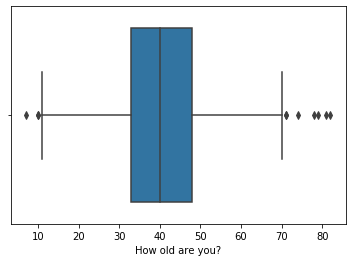

In [57]:
ax = sns.boxplot(x=df["How old are you?"])


The majority of answers seems to osciliate between just over 30 and just below 50 years old. Let's check it more in detail.

In [58]:
df["How old are you?"].value_counts()

35    50
33    49
45    48
38    48
34    45
46    44
42    44
47    41
32    39
40    39
43    38
30    35
48    34
36    34
37    33
31    32
44    32
39    31
41    30
28    30
29    29
50    29
26    26
55    26
49    24
52    20
58    20
54    19
51    17
56    17
27    17
53    16
25    13
57    12
59    12
60    11
24    10
23     7
17     7
61     6
63     6
64     6
16     5
20     5
62     5
18     5
22     4
67     4
19     4
66     3
21     2
68     2
10     2
71     2
70     2
13     2
11     1
12     1
15     1
14     1
82     1
81     1
65     1
74     1
78     1
79     1
7      1
Name: How old are you?, dtype: int64

In [59]:
df["How old are you?"].describe()

count    1184.000000
mean       40.635135
std        10.996441
min         7.000000
25%        33.000000
50%        40.000000
75%        48.000000
max        82.000000
Name: How old are you?, dtype: float64

The above confirms that the answer to the question

<b>5) What age group is predominant in the answers?</b>

is that 

<b>50% of the respondents are between 33 and 48 years old. From value_counts() we could see that the 5 most popular ages were 35, 33, 45, 38 and 34.</b>
    
Let's check whether there is a difference in age between males and females?

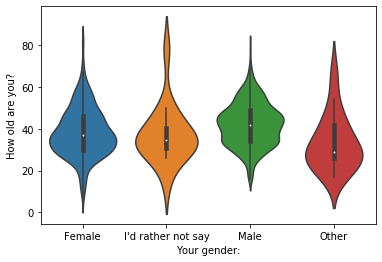

In [60]:
# And let's make some analysis around the gender.
# We can for example portray the gender and age repartition thanks to the Seaborn library

ax = sns.violinplot(x="Your gender:", y="How old are you?", data=df)

It seems that the average of respondents age is lower for females than for males. It's even lover for the "Other" gender category. Interestingly, the age repartition for the gender category "I'd rather not say" has a similar shape to the one for the Females.

We can try to check the data more precisely with a boxplot.

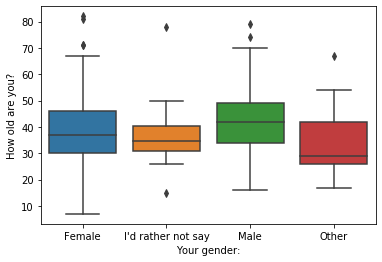

In [61]:
ax = sns.boxplot(x="Your gender:", y="How old are you?", data=df)

## Let's summarize the answers to the questions here:

<b>1) Which sweets are the most well known and which the less well known?</b><br>
- Most well known : Hershey’s Milk Chocolate 
- Least well known : Maynards

<b>2) What are the most liked and the most disliked sweets?</b><br><br>
Most liked : 
- Any full-sized candy bar
- Reese's Peanut Butter Cups
- Cash, or other forms of legal tender.

Most disliked : 
- Broken glow stick
- White Bread
- Gum from baseball cards
- Kale smoothie

<b>3) What is the proportion of male and female respondents?</b>
- Male 64,02% 
- Female 33,19%

We also have other gender answers :
- Other 1,44%
- I'd rather not say 1,35%

<b>4) Do male and female respondents like the same sweets?</b>

Independently of gender, people love cash, any candy bar, Peanut Butter cup or a Kit Kar. Percentages of love for a specific sweet from a specific gender can vary.

<b>5) What age group is predominant in the answers?</b><br><br>
50% of the respondents are between 33 and 48 years old. The 5 most popular ages were 35, 33, 45, 38 and 34.

## Other possible analysis of this dataset could have been : <br><br>
<i>
- Time series to check the day of the week or time of the day with most answers<br><br>
- Geographical analysis (number of respondents per country, their gender and age, favourite sweets per country). I've tried to clean the country column in a separate analysis and saw that most respondents were in the USA so I'd rather do a cross country analysis with another dataset<br><br>
- Prediction of gender in the I'd rather not say column, based on the answers to the survey.
</i>